In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
plt.style.use("customstyle")

import sys
sys.path.append("../modules")

import PBD_analog

colors = ["#" + x for x in ["000000","cf5c36","bcd696","985f99","9684a1"]]

In (Etienne and Rosindell 2012, Etienne et al. 2014), the approach more general since **even incipient lineages can form incipient lineage** with possibly a different rate. They define:
* $\lambda_1$ the rate for good species to form incipient species (equivalent of $b$ in our previous model),
* $\lambda_2$ the rate for incipient species to complete speciation (equivalent of $\lambda$),
* $\lambda_3$ the rate for incipient species to form an incipient lineage (in our model, it is 0),
* $\mu_1$ and $\mu_2$ are the death rates for good and incipient lineages (they were noted $\mu_G$ and $\mu_G$ previously). 

Specifically in (Etienne et al. 2014) they took $\lambda_1=\lambda_3=b$ and $\mu_1=\mu_2=\mu$. 

Let us build the associated model. 

### Probability of an incipient lineage to extinct
Considering one incipient lineage $L$ that has still no descendent, there are two issues:
* the lineage or one of its descendent at least complete speciation (we will denote this event as "complete"),
* nor the lineage or any of its descendent complete speciation before dying (we will denote this event as "not complete"). 

Let us calculate $\pi := \mathbb{P} (L \text{ not completes})$. 

We denote $N$ the number of direct descendents of the lineage before it dies of completes speciation, and $L$ and $L_1, ..., L_N$ those lineages. All the possible events that can happen to $L$ (completion at rate $\lambda_2$, new incipient lineage at rate $\lambda_3$ or extinction at rate $\mu_2$) are independent jump process. The first one to happen is therefore a jump process with rate $\lambda_2+\lambda_3+\mu_2$ and the probability that it is the formation of an incipient lineage is $\lambda_3 / (\lambda_2+\lambda_3+\mu_2)$. We can thus decompose:
\begin{align*}
	\pi &= \sum_{n=0}^{+\infty} \mathbb{P} (L \text{ has $n$ children}) \mathbb{P} (L \text{ dies}) \prod_{i=1}^{n} \mathbb{P} (L_i \text{ not completes}) \\ 
	&= \sum_{n=0}^{+\infty} \left( \frac{\lambda_3}{\lambda_2+\lambda_3+\mu_2} \right)^n \frac{\mu_2}{\lambda_2+\lambda_3+\mu_2} \pi^n. 
\end{align*}

Therefore 

\begin{align*}
	\pi = \frac{\mu_2}{\lambda_2+\lambda_3+\mu_2} \times \frac{1}{1- \frac{\pi \lambda_3}{\lambda_2+\lambda_3+\mu_2}} \Leftrightarrow \pi^2 - \pi \frac{\lambda_2+\lambda_3+\mu_2}{\lambda_3} + \frac{\mu_2}{\lambda_3} = 0.
\end{align*}
With $x:=\lambda_3 / (\lambda_2 + \lambda_3 + \mu_2)$ and $y:=\mu_2 / (\lambda_2 + \lambda_3 + \mu_2)$, the two solutions of this polynomial equation are 
$$ \pi_{\pm} = \frac{1}{2x} \left(1 \pm \sqrt{1-4xy}\right)$$

These solutions are well defined because 
$$x+y\le 1 \Rightarrow 4xy \leq 4y(1-y) \le 1.$$

These solutions are positive. Since $\pi$ is a probability, it needs to be in $[0,1]$. 

**Case 1** $x<y$. 

Then the condition $x+y\leq1$ implies $x<\frac{1}{2}$ so $\frac{1}{2x}>1$ so $\pi_+>1$. 

We can prove that $\pi_- \leq 1$:
\begin{align*} 
x+y \leq 1 &\Rightarrow 4x^2 - 4x+4xy \leq 0 \\ 
&\Rightarrow 1 - 4xy \geq 1-4x+4x^2 = (1-2x)^2 \\ 
&\Rightarrow \sqrt{1-4xy} \geq 1-2x > 0 \\ 
&\Rightarrow \pi_- \leq 1.
\end{align*}
In this case, the solution is $\pi = \pi_-$. We note that $\pi_-=1$ when $x+y=1 \Leftrightarrow \lambda_2 = 0$. 

**Case 2** $x\ge y$.

_Subcase 2.1_ $x<\frac{1}{2}$.  Then for the same reason $\pi_+ > 1$ and $\pi_- < 1$ so the solution is $\pi = \pi_-$. This case implies $\lambda_2 > 0$ since $x+y<1$. 

_Subcase 2.2_ $x \ge \frac{1}{2}$. Then
\begin{align*} 
1-2x \le 0 &\Rightarrow \sqrt{1-4xy} \ge 1-2x \\
&\Rightarrow \pi_- \le 1. 
\end{align*}
For $\pi_+$, we note that 
\begin{align*} 
\pi_+ \ge 1 \Leftrightarrow f_y(x) := 1 - 2x + \sqrt{1-4xy} \ge 0 
\end{align*}
with the equalities equivalent too. 
We note that $x\mapsto f_y(x)$ decreases and we can show that $f_y(x) = 0 \Leftrightarrow x = 1-y$ (with the conditon $2x \ge 1$). So $\pi_+ \geq 1$ and $\pi_+ = 1 \Leftrightarrow x + y = 1 \Leftrightarrow \lambda_2 = 0$. In this latter case, both $\pi_-$ and $\pi_+$ are in $[0,1]$, but $\pi_+ = 1$ is the good solution. 

To summarize, the solution is always $\pi = \pi_-$ except when $\lambda_2 = 0$, then the solution is $1$ which can be different of $\pi_-$ if $\mu_2 < \lambda_3$. 

Let us check this, since we only consider an incipient lineage here, we set $N_g(0) = 0$ and $N_i(0) =1$. 

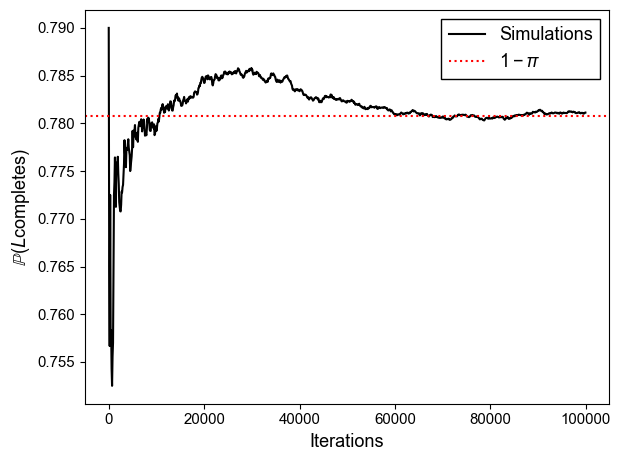

In [6]:
init = {'n_g0':0,'n_i0':1}
param = {'l1' : 0.01, 'l2' : 0.01,'l3' : 0.01, 'm1' : 0.005, 'm2' : 0.005}
sim_param = {'n_sim':100000, 'step':100}
sim = PBD_analog.simul_prot_etienne(**init, **param, **sim_param)
T, Speciation, T_mean, T_mean_spec, F_speciation, Nb_direct_incipient = sim["T"], sim["Speciation"], sim["T_mean"], sim["T_mean_spec"], sim["F_speciation"], sim["Nb_direct_incipient"]

#  Plot
fig_pi, ax_pi = plt.subplots()
ax_pi.plot(sim_param['step'] * np.arange(sim_param['n_sim']//sim_param['step']), F_speciation, label = "Simulations")
pi_ = PBD_analog.pi(**param)
ax_pi.axhline(y = 1-pi_, ls = ":", color = "red", label = "$1-\\pi$")
ax_pi.legend()
ax_pi.set_xlabel("Iterations")
ax_pi.set_ylabel("$\\mathbb{P}(L \\mathrm{ completes})$")

plt.savefig("../fig/test_predictions/test_pi.pdf")

### Probability for a lineage to complete speciation
Let us now consider a good lineage. We will here calculate the probability for this lineage to give birth to an incipient species that will eventually complete speciation. The idea is to only consider the incipient lineage that will finally complete speciation: it is a proportion $1-\pi$ of all incipient lineage. The rate at which the good lineage produces successful incipient lineages is thus $(1-\pi)\lambda_1$. We ignore the other incipient lineages. The probability that the main lineage forms at least one successful incipient one before going extinct is therefore:
$$ \mathbb{P} (\text{speciation}) = \frac{(1-\pi(\lambda_2, \lambda_3, \mu_2))\lambda_1}{\mu_1 + (1-\pi(\lambda_2, \lambda_3, \mu_2))\lambda_1}.$$

### Time for speciation 
The time before speciation is more difficult to calculate with the methods previously used because the waiting time now have memories: for an incipient lineage, the more we wait, the more likely it is to have multiple children and the more likely they are to complete speciation soon. Etienne and Rosindell 2012 (Supp.mat.S4) calculated the distribution of the time $\tau$ it takes for an incipient lineage to have a descendent or itself completing speciation, the PDF and expectation are 
\begin{align*}
	f_{\tau}(t) =  \frac{2 D^2 e^{-Dt}(D+\varphi) }{ \left(D+\varphi + e^{-Dt} (D-\varphi)\right)^2} \quad \text{and} \quad \mathbb{E} [\tau] = \frac{2}{D - \varphi} \log \left(\frac{2}{1 + \frac{\varphi}{D}}\right) 
\end{align*}
with
$$ D = \sqrt{(\lambda_2+\lambda_3)^2 + 2 (\lambda_2-\lambda_3)\mu_2+\mu_2^2} \quad \text{and} \quad \varphi = \lambda_2 - \lambda_3 +\mu_2. $$

This distribution is not exponential but can be delayed with a positive mode:

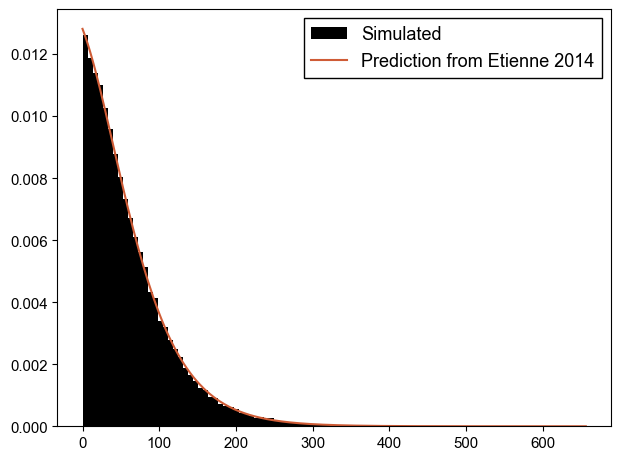

In [7]:
figH, axH = plt.subplots()
axH.hist(T[Speciation], density = True, bins = 100, label = "Simulated")
x = np.linspace(0, np.max(T[Speciation]), num = 200)
y = PBD_analog.tau_pdf(x, **param)

axH.plot(x, y, label = "Prediction from Etienne 2014")
axH.legend(loc = "best")

plt.savefig("../fig/test_predictions/test_distrib_tau.pdf");

We can also check the value for $\mathbb{E}[\tau]$:

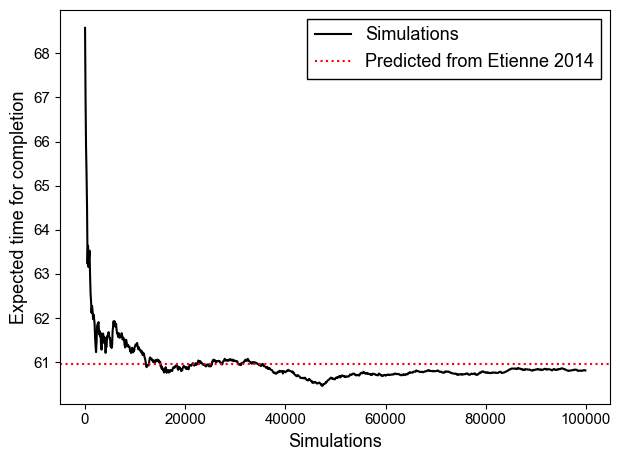

In [8]:
tau_ = PBD_analog.tau(**param)
figT, axT = plt.subplots()
axT.plot(sim_param['step'] * np.arange(sim_param['n_sim']//sim_param['step']), T_mean_spec, label = "Simulations")
axT.axhline(y=tau_, ls=":", color="red", label = "Predicted from Etienne 2014")
axT.set_xlabel("Simulations")
axT.set_ylabel("Expected time for completion")
axT.legend()

plt.savefig("../fig/test_predictions/test_tau_expectation.pdf")

However $\tau$ is only the time for an incipient lineage to complete speciation. It does not take into account the time for that incipient lineage to appear, nor which incipient lineage that is the first to complete speciation. The waiting $T$ time before any incipient lineage from a good one completes speciation is more complicated to characterize since it is the minimum of several non exponential variables. With $M \geq 0$ the number of successful incipient lineages from the good lineage, $\tau_i$ the duration for an incipient lineage $i$ to complete speciation and $T_i$ the time at which this lineage start we can define:

\begin{align*}
	T =     
	\begin{cases}
		+\infty & \text{if } M = 0\\
		\min \{T_i + \tau_i, i = 1, ..., M\} & \text{if } M \geq 1
	\end{cases}. 
\end{align*}

The variables $\tau_i$ are independent and distributed as the variable $\tau$ previously described, the $T_i$ are successive jump times with rate $(1-\pi)\lambda_1 + \mu_1$ and the variable $M+1$ is geometric with success rate $\mu_1 / ((1-\pi)\lambda_1 + \mu_1)$. 

We can approximate $T$ by assuming that $\mathbb{E} [T_1] \gg \mathbb{E}[\tau]$. In this case, one a successful incipient lineage has appeared, it is likely to have overcome speciation before the next successful lineages appear. Then in the definition of $T$ we can approximate that the minimum time is reached for $i=1$. Then 
$$T \mathbb{1}_{M \geq 1} \approx \mathbb{1}_{M \geq 1} \left(T_1 + \tau_1 \right) $$ 
and we can easily calculate the expectation:
\begin{align*} 
	\mathbb{E} [T] \mathbb{P}(\text{speciation}) &\approx \mathbb{P} ({\mathrm{speciation}}) \left(\mathbb{E} [T_1] + \mathbb{E}  [\tau_1] \right) \\ 
	&\approx \frac{(1-\pi(\lambda_2, \lambda_3, \mu_2))\lambda_1}{\mu_1 + (1-\pi(\lambda_2, \lambda_3, \mu_2))\lambda_1} \left(\frac{1}{(1-\pi)\lambda_1 + \mu_1} + \frac{2}{D - \varphi} \log \left(\frac{2}{1 + \frac{\varphi}{D}}\right) \right). 
\end{align*}

And therefore:

$$
	\mathbb{E} [T | \text{speciation}] 	\approx  \frac{1}{(1-\pi)\lambda_1 + \mu_1} + \frac{2}{D - \varphi} \log \left(\frac{2}{1 + \frac{\varphi}{D}}\right). 
 $$
This approximation overestimates the true expectation, however simulations show that it is a good approximation of the observed average time $T$.

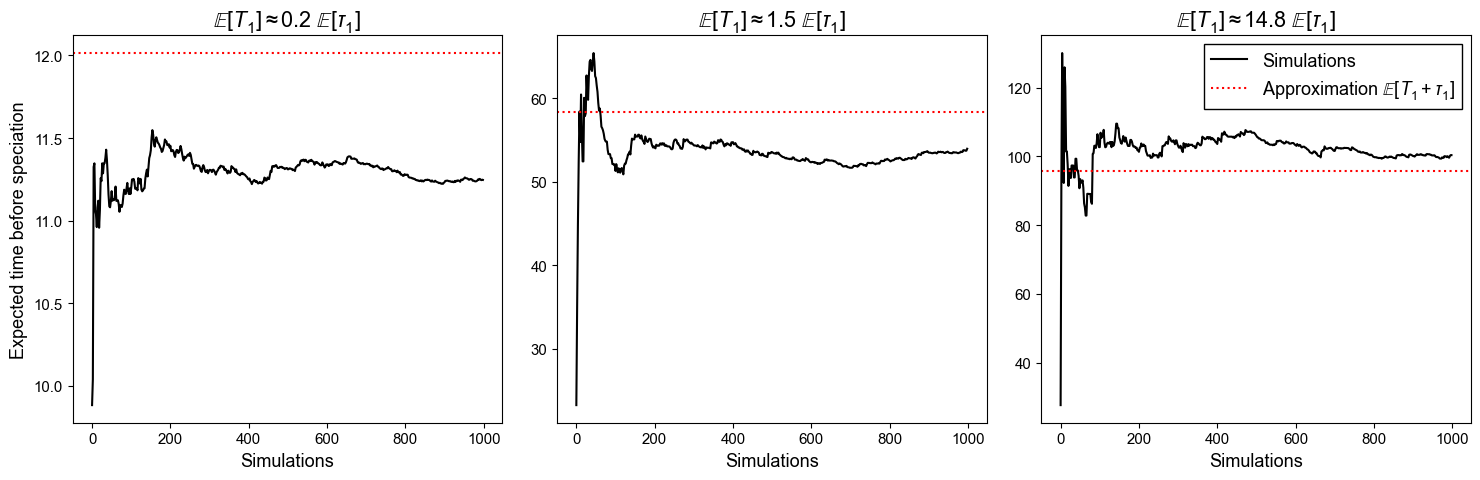

In [10]:
param_list = [{'l1' : 0.5, 'l2' : 0.0001,'l3' : 0.9, 'm1' : 0.03, 'm2' : 0.001},
            {'l1' : 0.05, 'l2' : 0.01,'l3' : 0.1, 'm1' : 0.01, 'm2' : 0.08},
            {'l1' : 0.1, 'l2' : 0.01,'l3' : 0.05, 'm1' : 0.005, 'm2' : 0.2}]
init = {'n_g0':1,'n_i0':0}
sim_param_list = [{'n_sim':1000, 'step':2}, {'n_sim':1000, 'step':2}, {'n_sim':1000, 'step':2}]
figTa, axTa = plt.subplots(1, len(param_list), figsize = (15,5))
Nb_di = [None] * len(param_list) 
for i in range(len(param_list)):
    param, sim_param = param_list[i], sim_param_list[i]
    sim = PBD_analog.simul_prot_etienne(**init, **param, **sim_param)
    T, Speciation, T_mean, T_mean_spec, F_speciation, Nb_direct_incipient = sim["T"], sim["Speciation"], sim["T_mean"], sim["T_mean_spec"], sim["F_speciation"], sim["Nb_direct_incipient"]
    Nb_di[i] = Nb_direct_incipient
    approxT = PBD_analog.approx_expected_T(**param)
    axTa[i].plot(sim_param['step'] * np.arange(sim_param['n_sim']//sim_param['step']), T_mean_spec, label = "Simulations")
    axTa[i].axhline(y=approxT, ls=":", color="red", label = "Approximation $\\mathbb{E}[T_1 + \\tau_1]$")
    axTa[i].set_xlabel("Simulations")
    tau_ = PBD_analog.tau(**param)
    ratio = (approxT - tau_) / tau_
    axTa[i].title.set_text("$\\mathbb{E}[T_1] \\approx$" + ('%3.1f' % ratio) + " $\\mathbb{E}[\\tau_1]$")


axTa[0].set_ylabel("Expected time before speciation")
axTa[-1].legend()

plt.savefig("../fig/test_predictions/test_approx_T.pdf")

The estimation $\mathbb{E} [T] \approx \mathbb{E} [T_1 + \tau_1]$ (we supposte that the first successful incipient lineage will speciate first) is reasonable in most cases, thus less precise when $\mathbb{E}[T_1]$ is low compared to $\mathbb{E}[\tau_1]$. These cases are met when $\lambda_2<< \lambda_1$ (the incipient lineage take a very long time to complete, so many incipient lineage might emerge from the good species). To test that hypothesis, let us plot the number of incipient species direcly emerging from the good species before the speciation completes.

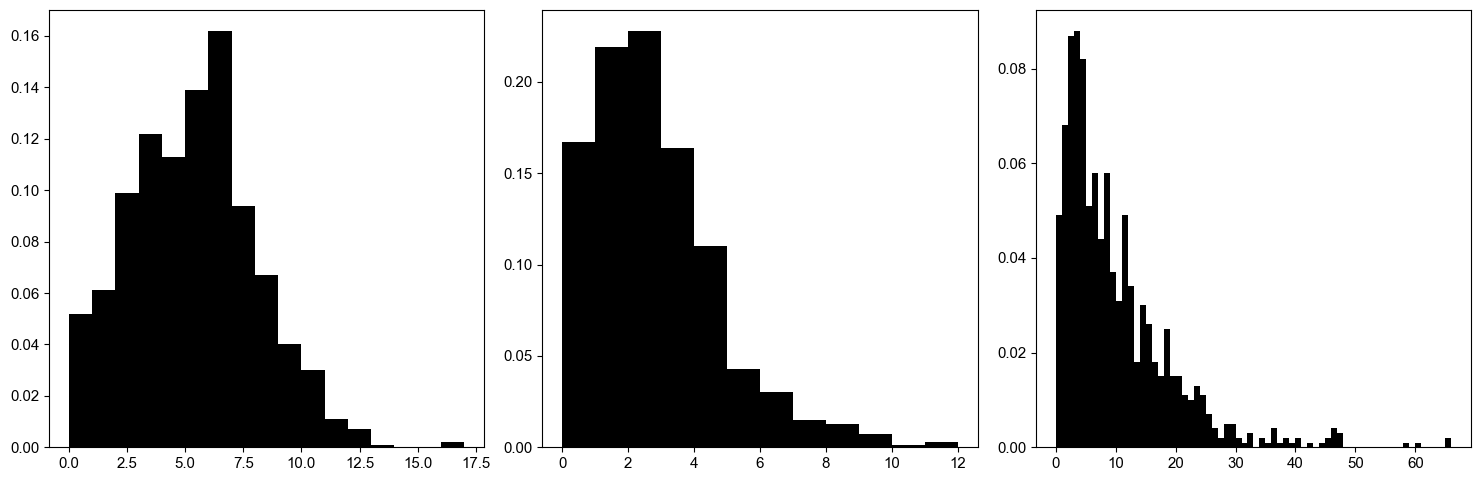

In [11]:
figBp, axBp = plt.subplots(1, len(param_list), figsize = (15,5))
for i in range(len(param_list)):
    axBp[i].hist(Nb_di[i], density = True, bins = int(max(Nb_di[i])))

### Prediction of the macroevolutionary rates
Since the expected time for speciation and the probability of speciation can be written as functions the the birth and death rates under the BD model ($\hat\lambda, \hat\mu$) we have:
$$\hat\lambda = \frac{\mathbb{P}(T<\infty)}{\mathbb{E}[T | T <\infty]} \quad \text{and} \quad \hat\mu = \frac{ 1 - \mathbb{P}(T<\infty)}{\mathbb{E}[T | T <\infty]}.$$

Using what we derived previously we therefore have the following predictions:

$$  \boxed{\hat\lambda = \frac{(1 - \pi) \lambda_1}{1 + (\mu_1 + (1-\pi)\lambda_1) \times \frac{ 2 }{D - \varphi} \log \left( \frac{2D}{D + \varphi} \right)}} $$

and 
$$ \boxed{\hat\mu =  \frac{\mu_1}{1 + (\mu_1 + (1-\pi)\lambda_1) \times \frac{ 2 }{D - \varphi} \log \left( \frac{2D}{D + \varphi} \right)}} $$

with :
$$\pi = \frac{1}{2} \frac{\lambda_2 + \lambda_3 + \mu_2}{\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right), \quad 
D = \sqrt{(\lambda_2+\lambda_3)^2 + 2 (\lambda_2-\lambda_3)\mu_2+\mu_2^2} \quad \text{and} \quad \varphi = \lambda_2 - \lambda_3 +\mu_2. $$

### Influence of the parameters on the predictions
In this section we explore how the predictions 
$$\mathbb{P} (\text{Speciation}), \mathbb{E}[\tau], \mathbb{E} [T_1 + \tau], 1-\pi = \mathbb{P} (\text{Speciation} | \text{incipient})$$
vary with the rates of the protracted speciation model ($\lambda_1, \lambda_2, \lambda_3, \mu_1, \mu_2$). 

c:\Users\pveron\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\pveron\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


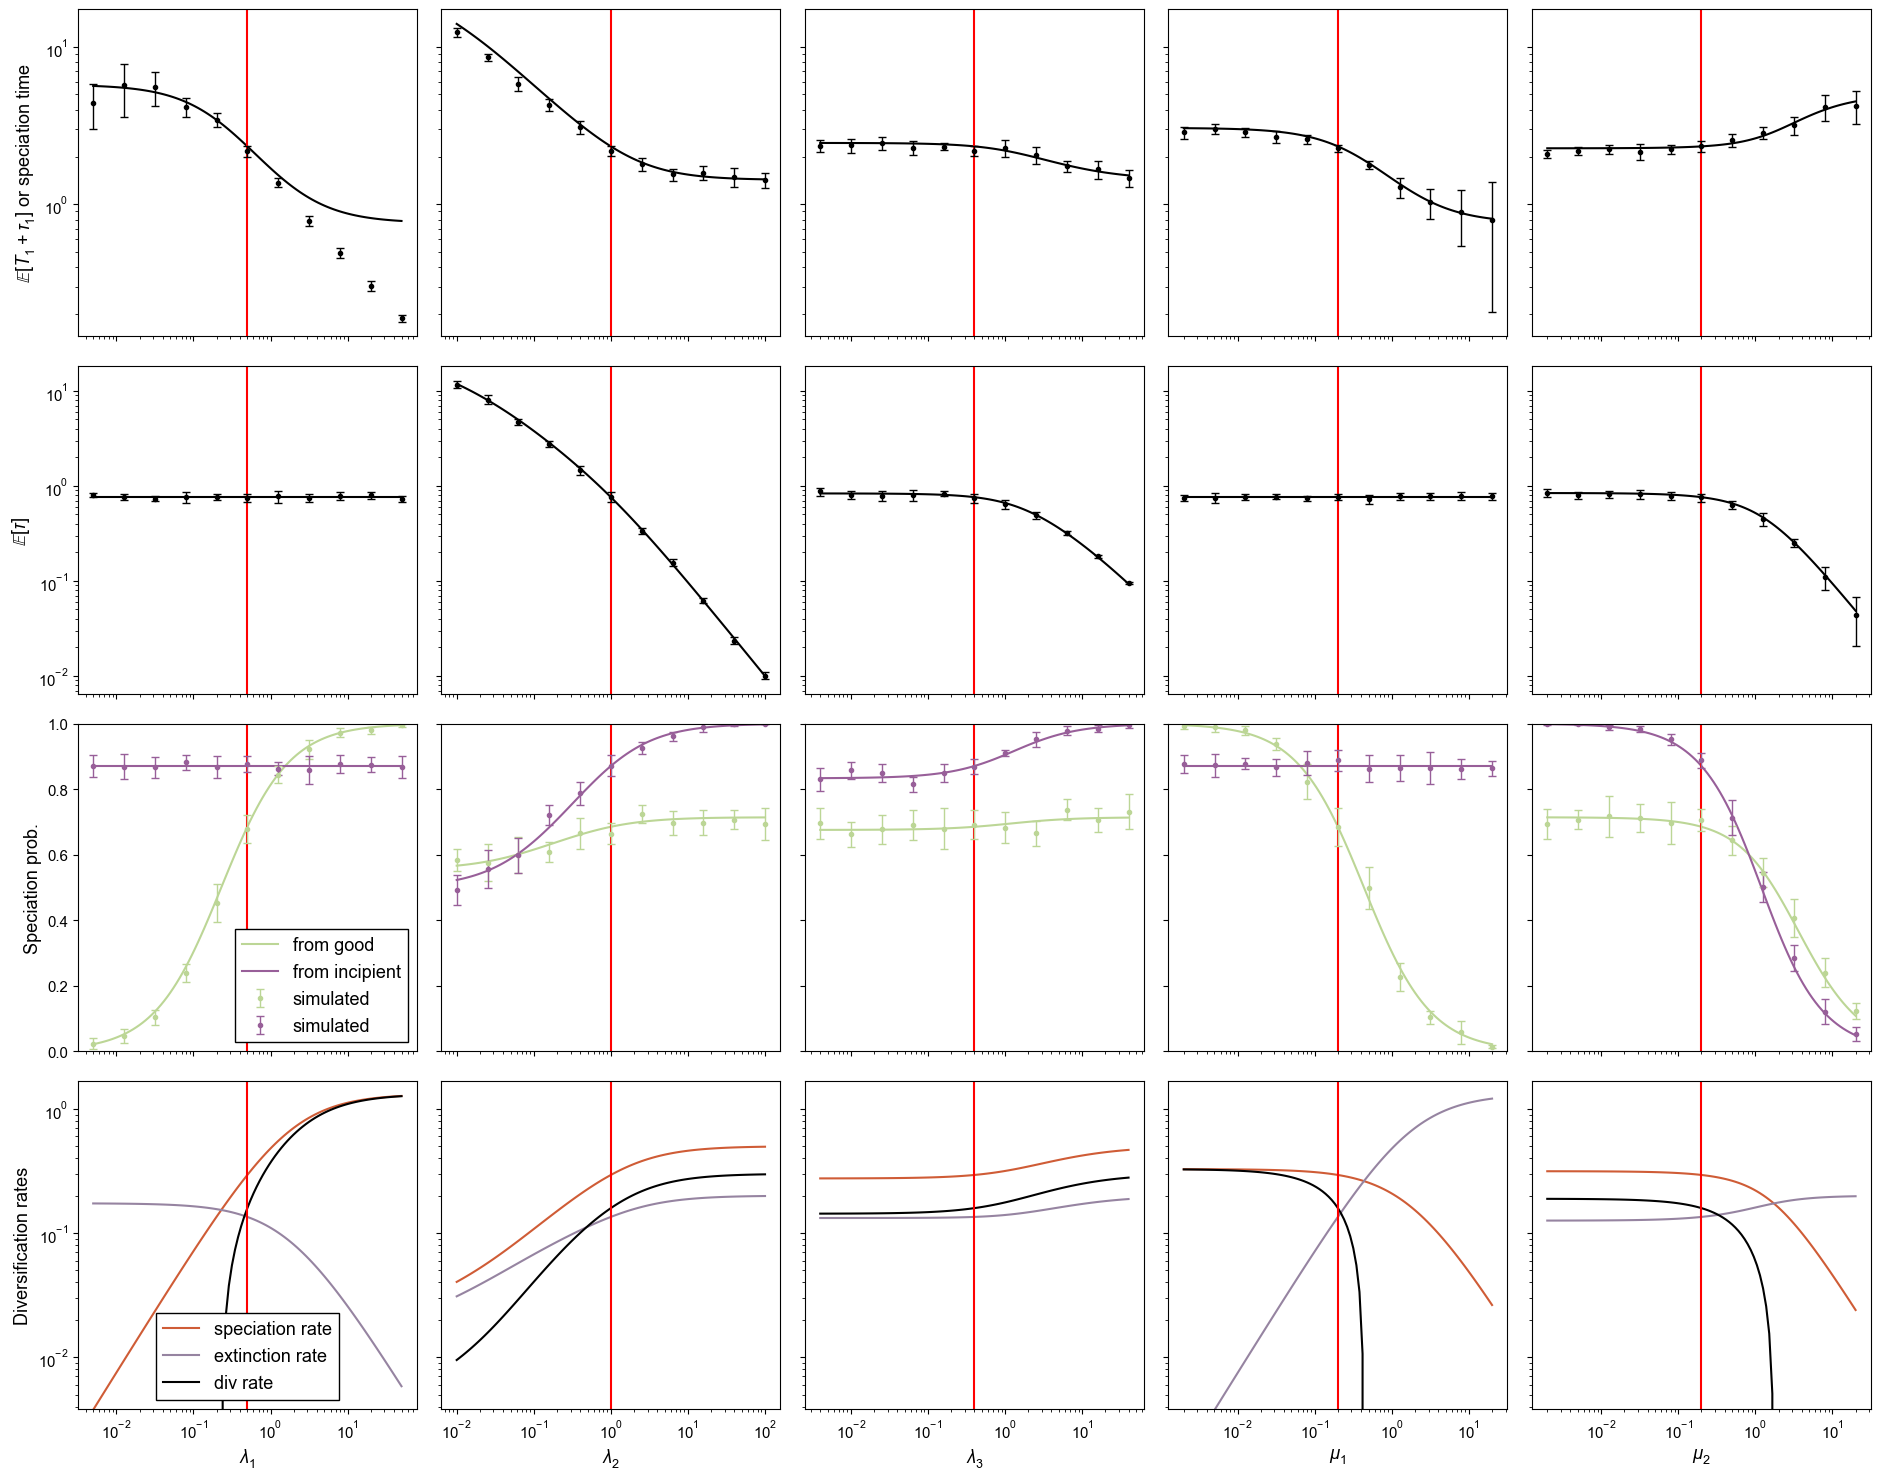

In [13]:
fig_eq, axes_eq = plt.subplots(4,5, figsize = (19,15), sharey = "row", sharex = "col")
param = {'l1' : 0.5, 'l2' : 1.0,'l3' : 0.4, 'm1' : 0.2, 'm2' : 0.2} 
colname = ["PBD.l1", "PBD.l2","PBD.l3","PBD.mu1","PBD.mu2"]

lbl = ["$\\lambda_1$", "$\\lambda_2$", "$\\lambda_3$", "$\\mu_1$","$\\mu_2$"]
list_param = list(param.keys())
fct_pred = np.power(10, np.linspace(-2, 2, num = 101)) # variation of each parameter around its default value
fct_sim = np.power(10, np.linspace(-2, 2, num = 11))

# for the simulations
sim_param = {'n_sim':100, 'step':100}
rep = 10 # number of replicates

for i in range(len(list_param)):
    focus_param = list_param[i]
    other_param = param.copy()
    other_param.pop(focus_param)
    x = param[focus_param] * fct_pred
    other_param[focus_param] =  x
    p_speciation_ = PBD_analog.p_speciation(**other_param)
    tau_ = PBD_analog.tau(**other_param)
    approx_expected_T_ = PBD_analog.approx_expected_T(**other_param)
    pi_ = PBD_analog.pi(**other_param)
    spe_rate_ = p_speciation_ / approx_expected_T_
    ext_rate_ = (1-p_speciation_) / approx_expected_T_
    axes_eq[0,i].plot(x, approx_expected_T_)
    axes_eq[0,i].set_xscale('log')
    axes_eq[0,i].set_yscale('log')
    axes_eq[1,i].plot(x,tau_)
    axes_eq[1,i].set_xscale('log')
    axes_eq[1,i].set_yscale('log')
    axes_eq[2, i].plot(x, p_speciation_, label = "from good", color = "#bcd696")
    axes_eq[2, i].set_xscale("log")
    axes_eq[2, i].set_ylim([0,1])
    axes_eq[2, i].plot(x, 1-pi_, label = "from incipient", color = "#985f99")
    axes_eq[3, i].plot(x, spe_rate_, label = "speciation rate", color = "#cf5c36")
    axes_eq[3, i].plot(x, ext_rate_, label = "extinction rate", color = "#9684a1")
    axes_eq[3, i].plot(x, spe_rate_ - ext_rate_, label = "div rate", color = "k")
    axes_eq[3, i].set_xscale("log")
    axes_eq[3, i].set_yscale("log")
    axes_eq[0,i].axvline(x = param[focus_param], color = "red")
    axes_eq[1,i].axvline(x = param[focus_param], color = "red")
    axes_eq[2,i].axvline(x = param[focus_param], color = "red")
    axes_eq[3,i].axvline(x = param[focus_param], color = "red")
    axes_eq[-1,i].set_xlabel(lbl[i])
    
    
    
    xx = param[focus_param] * fct_sim
    T_sim, tau_sim, p_spec_sim, pi_sim = np.zeros((len(xx), rep)), np.zeros((len(xx), rep)), np.zeros((len(xx), rep)), np.zeros((len(xx), rep))
    for j in range(rep):
        for k in range(len(xx)):
            variant = param.copy()
            variant.pop(focus_param)
            variant[focus_param] = xx[k]
            sim = PBD_analog.simul_prot_etienne(**variant, **sim_param, n_g0 = 1, n_i0 = 0) # simulations for good lineage
            T_sim[k, j] = sim["T_mean_spec"][-1]
            p_spec_sim[k,j] = sim["F_speciation"][-1]
            sim = PBD_analog.simul_prot_etienne(**variant, **sim_param, n_g0 = 0, n_i0 = 1) # simulations for incipient lineage 
            tau_sim[k, j] = sim["T_mean_spec"][-1]
            pi_sim[k,j] = 1 - sim["F_speciation"][-1]
    stl = {"ls": "", "marker":"o", "label":"simulated", "elinewidth":1, "markersize" : 3, "capsize" : 3}
    axes_eq[0, i].errorbar(xx, np.nanmean(T_sim, axis = 1), yerr = np.nanstd(T_sim, axis = 1), **stl, color = "k")
    axes_eq[1, i].errorbar(xx, np.nanmean(tau_sim, axis = 1), yerr = np.nanstd(tau_sim, axis = 1), **stl, color = "k")
    axes_eq[2, i].errorbar(xx, np.nanmean(p_spec_sim, axis = 1), yerr = np.nanstd(p_spec_sim, axis = 1), **stl, color = "#bcd696")
    axes_eq[2, i].errorbar(xx, np.nanmean(1-pi_sim, axis = 1), yerr = np.nanstd(1-pi_sim, axis = 1), **stl, color = "#985f99")


axes_eq[2,0].legend()
axes_eq[3,0].legend()
axes_eq[0,0].set_ylabel("$\\mathbb{E}[T_1 + \\tau_1]$ or speciation time")
axes_eq[1,0].set_ylabel("$\\mathbb{E}[\\tau]$")
axes_eq[2,0].set_ylabel("Speciation prob.")
axes_eq[3,0].set_ylabel("Diversification rates")

plt.savefig("../fig/test_predictions/proxy_vary_parameters.pdf")